# Comparing the different velocity components betwen N2Hp and HC3N

Re-do this with the new quality assessment

In [1]:
import numpy as np
import os
import pandas as pd

import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import SkyCoord, FK5
# from astropy.visualization.wcsaxes import add_beam, add_scalebar
from reproject import reproject_interp

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
# from matplotlib.colors import AsinhNorm

from copy import copy
from scipy import stats
from scipy.integrate import simpson
from scipy.stats import gaussian_kde
%matplotlib widget

overwrite=False

In [2]:
# N2Hp
#red layer clusters
clump0_N2Hp_file = 'cluster0_DBSCAN_N2Hp.fits'
clump3_N2Hp_file = 'cluster3_DBSCAN_N2Hp.fits'
red_clumps_N2Hp_files = [clump0_N2Hp_file, clump3_N2Hp_file]
red_clumps_N2Hp_filename = 'clusters_red_N2Hp.fits'
#blue layer clusters
clump1_N2Hp_file = 'cluster1_DBSCAN_N2Hp.fits'
clump2_N2Hp_file = 'cluster2_DBSCAN_N2Hp.fits'
clump4_N2Hp_file = 'cluster4_DBSCAN_N2Hp.fits'
blue_clumps_N2Hp_files = [clump1_N2Hp_file, clump2_N2Hp_file, clump4_N2Hp_file]
blue_clumps_N2Hp_filename = 'clusters_blue_N2Hp.fits'

#HC3N
#red layer clusters
clump0_HC3N_file = 'cluster0_HDBSCAN_HC3N.fits'
clump1_HC3N_file = 'cluster1_HDBSCAN_HC3N.fits'
clump3_HC3N_file = 'cluster3_HDBSCAN_HC3N.fits'
clump4_HC3N_file = 'cluster4_HDBSCAN_HC3N.fits'
red_clumps_HC3N_files = [clump0_HC3N_file, clump1_HC3N_file, clump3_HC3N_file, clump4_HC3N_file]
red_clumps_HC3N_filename = 'clusters_red_HC3N.fits'

#blue layer clusters
clump2_HC3N_file = 'cluster2_HDBSCAN_HC3N.fits'
clump6_HC3N_file = 'cluster6_HDBSCAN_HC3N.fits'
clump7_HC3N_file = 'cluster7_HDBSCAN_HC3N.fits'
blue_clumps_HC3N_files = [clump2_HC3N_file, clump6_HC3N_file, clump7_HC3N_file]
blue_clumps_HC3N_filename = 'clusters_blue_HC3N.fits'
# clump_HC3N_file = 'cluster1_HC3N_w0.5_r2'
# I made sure this is also in order T, v, sigma

In [3]:
# we fitst load the data
# while loading the data we will group them accordingly

if not os.path.exists(blue_clumps_HC3N_filename) or overwrite:
    shape_clump = np.shape(fits.getdata(clump0_HC3N_file))
    clump_blue_HC3N = np.zeros(shape_clump) * np.nan
    headerHC3Nclump = fits.getheader(clump0_HC3N_file)
    for HC3N_blue in blue_clumps_HC3N_files:
        clump_blue = fits.getdata(HC3N_blue)
        for i in range(6):
            for y in range(shape_clump[1]):
                for x in range(shape_clump[2]):
                    if ~np.isnan(clump_blue_HC3N[i, y, x]): continue 
                    else: clump_blue_HC3N[i, y, x] = clump_blue[i, y, x]
    fits.writeto(blue_clumps_HC3N_filename, clump_blue_HC3N, headerHC3Nclump)
else:
    clump_blue_HC3N, headerHC3Nclump = fits.getdata(blue_clumps_HC3N_filename, header=True)

if not os.path.exists(red_clumps_HC3N_filename) or overwrite:
    shape_clump = np.shape(fits.getdata(clump0_HC3N_file))
    clump_red_HC3N = np.zeros(shape_clump) * np.nan
    headerHC3Nclump = fits.getheader(clump0_HC3N_file)
    for HC3N_red in red_clumps_HC3N_files:
        clump_red = fits.getdata(HC3N_red)
        for i in range(6):
            for y in range(shape_clump[1]):
                for x in range(shape_clump[2]):
                    if ~np.isnan(clump_red_HC3N[i, y, x]): continue 
                    else: clump_red_HC3N[i, y, x] = clump_red[i, y, x]
    fits.writeto(red_clumps_HC3N_filename, clump_red_HC3N, headerHC3Nclump)
else:
    clump_red_HC3N, headerHC3Nclump = fits.getdata(red_clumps_HC3N_filename, header=True)
    
if not os.path.exists(blue_clumps_N2Hp_filename) or overwrite:
    shape_clump = np.shape(fits.getdata(clump0_N2Hp_file))
    clump_blue_N2Hp = np.zeros(shape_clump) * np.nan
    headerN2Hpclump = fits.getheader(clump0_N2Hp_file)
    for N2Hp_blue in blue_clumps_N2Hp_files:
        clump_blue = fits.getdata(N2Hp_blue)
        for i in range(6):
            for y in range(shape_clump[1]):
                for x in range(shape_clump[2]):
                    if ~np.isnan(clump_blue_N2Hp[i, y, x]): continue 
                    else: clump_blue_N2Hp[i, y, x] = clump_blue[i, y, x]
    fits.writeto(blue_clumps_N2Hp_filename, clump_blue_N2Hp, headerN2Hpclump)
else:
    clump_blue_N2Hp, headerN2Hpclump = fits.getdata(blue_clumps_N2Hp_filename, header=True)
    
# now N2Hp
if not os.path.exists(red_clumps_N2Hp_filename) or overwrite:
    shape_clump = np.shape(fits.getdata(clump0_N2Hp_file))
    clump_red_N2Hp = np.zeros(shape_clump) * np.nan
    headerN2Hpclump = fits.getheader(clump0_N2Hp_file)
    for N2Hp_red in red_clumps_N2Hp_files:
        clump_red = fits.getdata(N2Hp_red)
        for i in range(6):
            for y in range(shape_clump[1]):
                for x in range(shape_clump[2]):
                    if ~np.isnan(clump_red_N2Hp[i, y, x]): continue 
                    else: clump_red_N2Hp[i, y, x] = clump_red[i, y, x]
    fits.writeto(red_clumps_N2Hp_filename, clump_red_N2Hp, headerN2Hpclump)
else:
    clump_red_N2Hp, headerN2Hpclump = fits.getdata(red_clumps_N2Hp_filename, header=True)

In [4]:

# clump0_N2Hp, headerN2Hp = fits.getdata(clump0_N2Hp_file+'.fits', header=True)
# clump1_N2Hp = fits.getdata(clump1_N2Hp_file+'.fits')
# clump_HC3N, headerHC3N = fits.getdata(clump_HC3N_file+'.fits', header=True)

wcssky = WCS(headerN2Hpclump).celestial
# then we need to reproject:
if not os.path.exists(blue_clumps_HC3N_filename[:-5]+'_reproject.fits') or overwrite:
    clump_blue_HC3N_rep, footprint = reproject_interp(fits.PrimaryHDU(clump_blue_HC3N, headerHC3Nclump), headerN2Hpclump)
    # building the new header
    headerHC3Nnnew = headerHC3Nclump.copy()
    headerHC3Nnnew['NAXIS1'] =  headerN2Hpclump['NAXIS1']
    headerHC3Nnnew['NAXIS2'] =  headerN2Hpclump['NAXIS2']
    headerHC3Nnnew['CDELT1'] =  headerN2Hpclump['CDELT1']
    headerHC3Nnnew['CDELT2'] =  headerN2Hpclump['CDELT2']
    headerHC3Nnnew['CRVAL1'] =  headerN2Hpclump['CRVAL1']
    headerHC3Nnnew['CRVAL2'] =  headerN2Hpclump['CRVAL2']
    headerHC3Nnnew['CRPIX1'] =  headerN2Hpclump['CRPIX1']
    headerHC3Nnnew['CRPIX2'] =  headerN2Hpclump['CRPIX2']
    
    fits.writeto(blue_clumps_HC3N_filename[:-5]+'_reproject.fits', clump_blue_HC3N_rep, headerHC3Nnnew, overwrite=True)
else:
     clump_blue_HC3N_rep, headerHC3Nnnew= fits.getdata(blue_clumps_HC3N_filename[:-5]+'_reproject.fits', header=True)
    
    
if not os.path.exists(red_clumps_HC3N_filename[:-5]+'_reproject.fits') or overwrite:
    clump_red_HC3N_rep, footprint = reproject_interp(fits.PrimaryHDU(clump_red_HC3N, headerHC3Nclump), headerN2Hpclump)
    # building the new header
    headerHC3Nnnew = headerHC3Nclump.copy()
    headerHC3Nnnew['NAXIS1'] =  headerN2Hpclump['NAXIS1']
    headerHC3Nnnew['NAXIS2'] =  headerN2Hpclump['NAXIS2']
    headerHC3Nnnew['CDELT1'] =  headerN2Hpclump['CDELT1']
    headerHC3Nnnew['CDELT2'] =  headerN2Hpclump['CDELT2']
    headerHC3Nnnew['CRVAL1'] =  headerN2Hpclump['CRVAL1']
    headerHC3Nnnew['CRVAL2'] =  headerN2Hpclump['CRVAL2']
    headerHC3Nnnew['CRPIX1'] =  headerN2Hpclump['CRPIX1']
    headerHC3Nnnew['CRPIX2'] =  headerN2Hpclump['CRPIX2']
    
    fits.writeto(red_clumps_HC3N_filename[:-5]+'_reproject.fits', clump_red_HC3N_rep, headerHC3Nnnew, overwrite=True)
else:
     clump_red_HC3N_rep, headerHC3Nnnew= fits.getdata(red_clumps_HC3N_filename[:-5]+'_reproject.fits', header=True)
    
    

In [5]:
# now that they have the same projection, we can compare the velocity.

diff_blue_clumps_vel_file = 'diff_HC3N_w_N2Hp_clump_blue_vel.fits'
diff_red_clumps_vel_file = 'diff_HC3N_w_N2Hp_clump_red_vel.fits'
# diff_HC3N_N2Hp_0 = 'diff_HC3N_w_N2Hp_clump0.fits'
# diff_HC3N_N2Hp_1 = 'diff_HC3N_w_N2Hp_clump1.fits'
# mindiff_file = 'diff_HC3N_w_N2Hp_minimum.fits'

if not os.path.exists(diff_blue_clumps_vel_file) or overwrite:
    diff_blue_vel = clump_blue_HC3N_rep[1] - clump_blue_N2Hp[1]
    e_diff_blue_vel = clump_blue_HC3N_rep[4] + clump_blue_N2Hp[4]
    headerdiff = headerN2Hpclump.copy()
    headerdiff['NAXIS3'] = 2
    fits.writeto(diff_blue_clumps_vel_file, [diff_blue_vel, e_diff_blue_vel], headerdiff)
else:
    [diff_blue_vel, e_diff_blue_vel], headerdiff = fits.getdata(diff_blue_clumps_vel_file, header=True)
    

if not os.path.exists(diff_red_clumps_vel_file) or overwrite:
    diff_red_vel = clump_red_HC3N_rep[1] - clump_red_N2Hp[1]
    e_diff_red_vel = clump_red_HC3N_rep[4] + clump_red_N2Hp[4]
    headerdiff = headerN2Hpclump.copy()
    headerdiff['NAXIS3'] = 2
    fits.writeto(diff_red_clumps_vel_file, [diff_red_vel, e_diff_red_vel], headerdiff)
else:
    [diff_red_vel, e_diff_red_vel], headerdiff = fits.getdata(diff_red_clumps_vel_file, header=True)
    


Text(0.5, 1.0, 'Absolute value of the relative error $\\sigma_{\\Delta v} / |\\Delta v|$')

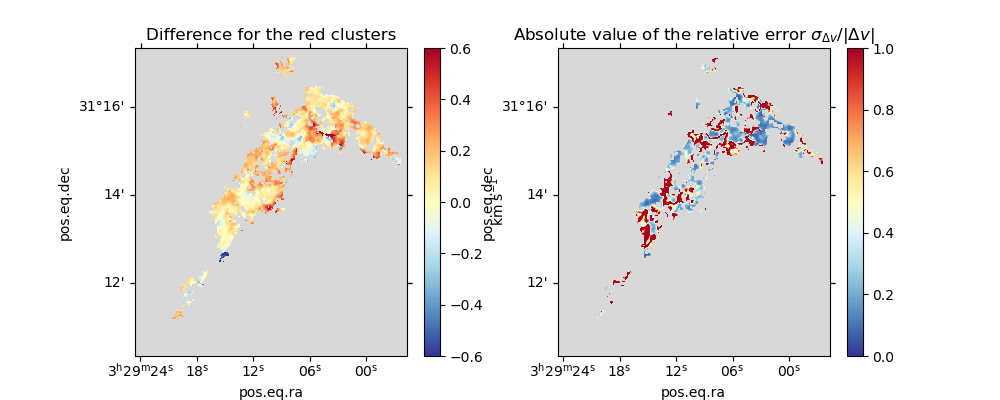

In [6]:
# we plot them quickly
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121, projection=WCS(headerdiff).celestial)
vmin=-0.6
vmax=0.6
cmap = cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('0.85')

sc = ax.imshow(diff_red_vel, cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(sc, ax=ax, label = r'km s$^{-1}$')
ax.set_title('Difference for the red clusters')

ax2 = fig.add_subplot(122, projection=WCS(headerdiff).celestial)
sc2 = ax2.imshow(np.abs(e_diff_red_vel/diff_red_vel), cmap=cmap, vmin=0, vmax=1)
fig.colorbar(sc2, ax=ax2)
ax2.set_title(r'Absolute value of the relative error $\sigma_{\Delta v} / |\Delta v|$')

# fig.savefig('difference_with_error_red_clusters.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Uncertainty of Difference for the red clusters')

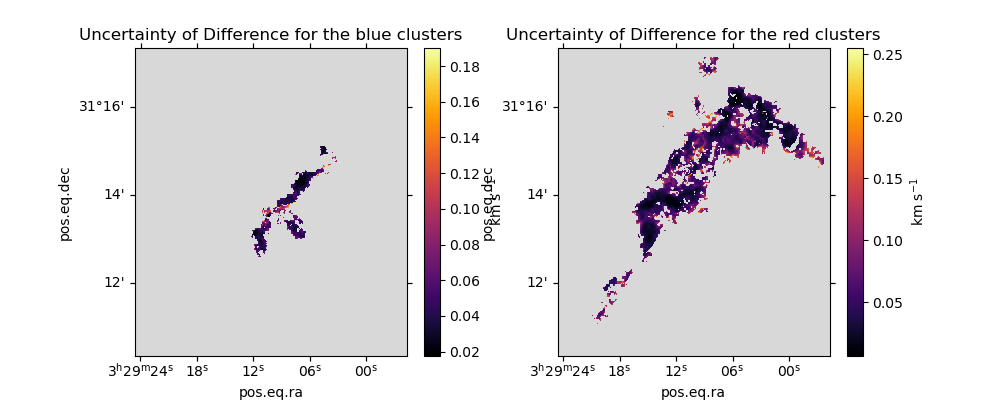

In [7]:
#we need to check first the absolute uncertainties of the map
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121, projection=WCS(headerdiff).celestial)
cmap = cm.get_cmap('inferno').copy()
cmap.set_bad('0.85')

sc = ax.imshow(e_diff_blue_vel, cmap=cmap, interpolation='nearest')
fig.colorbar(sc, ax=ax, label = r'km s$^{-1}$')
ax.set_title('Uncertainty of Difference for the blue clusters')

ax2 = fig.add_subplot(122, projection=WCS(headerdiff).celestial)
sc2 = ax2.imshow(e_diff_red_vel, cmap=cmap, interpolation='nearest')
fig.colorbar(sc2, ax=ax2, label = r'km s$^{-1}$')
ax2.set_title('Uncertainty of Difference for the red clusters')

We notice there are several places where the absolute difference is very large. This does not seem related to the uncertainties, which are randomly distributed, so what we will do is select only where the uncertainties are much smaller than the values themselves.


In [8]:
diff_blue_vel_filtered = np.where(diff_blue_vel/e_diff_blue_vel > 3, diff_blue_vel, np.nan)
diff_red_vel_filtered = np.where(diff_red_vel/e_diff_red_vel > 3, diff_red_vel, np.nan)



Text(0.5, 1.0, 'Difference for the red clusters')

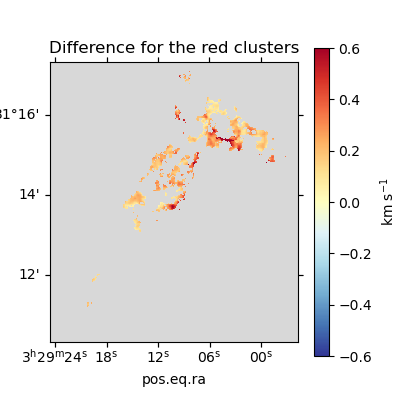

In [9]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection=WCS(headerdiff).celestial)
vmin=-0.6
vmax=0.6
cmap = cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('0.85')

sc = ax.imshow(diff_red_vel_filtered, cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(sc, ax=ax, label = r'km s$^{-1}$')
ax.set_title('Difference for the red clusters')


I feel like this biases the results. But what if we compare velocity with velocity?

In [10]:
diffkde_blue_file = 'diff_HC3N_w_N2Hp_blue_kde2d.npy'
diffkde_red_file = 'diff_HC3N_w_N2Hp_red_kde2d.npy'

# p_range = np.array([0.15865 * 100, 50., 0.84135 * 100]) # one sigma
xmin = 6
xmax = 9.5
    # y is v_LSR of 2Hp
ymin = 6
ymax = 9.5
if not os.path.exists(diffkde_blue_file) or overwrite:
    #x is vlsr of N2Hp
    
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    # we select only those who are not nan
    gd_vlos = np.isfinite(clump_blue_HC3N_rep[1] * clump_blue_N2Hp[1])
    values = np.vstack([clump_blue_N2Hp[1][gd_vlos], clump_blue_HC3N_rep[1][gd_vlos]])
    # we calculate the kernel distribution
    kernel = gaussian_kde(values)
    zz_blue = np.reshape(kernel(positions).T, xx.shape)
    zz_blue /= zz_blue.max()

    datasave = np.array([xx, yy, zz_blue])

    np.save(diffkde_blue_file, datasave)
else:
    datasave = np.load(diffkde_blue_file)
    xx, yy, zz_blue = datasave
    
if not os.path.exists(diffkde_red_file) or overwrite:
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    # we select only those who are not nan
    gd_vlos = np.isfinite(clump_red_HC3N_rep[1] * clump_red_N2Hp[1])
    values = np.vstack([clump_red_N2Hp[1][gd_vlos], clump_red_HC3N_rep[1][gd_vlos]])
    # we calculate the kernel distribution
    kernel = gaussian_kde(values)
    zz_red = np.reshape(kernel(positions).T, xx.shape)
    zz_red  /= zz_red .max()

    datasave = np.array([xx, yy, zz_red])

    np.save(diffkde_red_file, datasave)
else:
    datasave = np.load(diffkde_red_file)
    xx, yy, zz_red = datasave

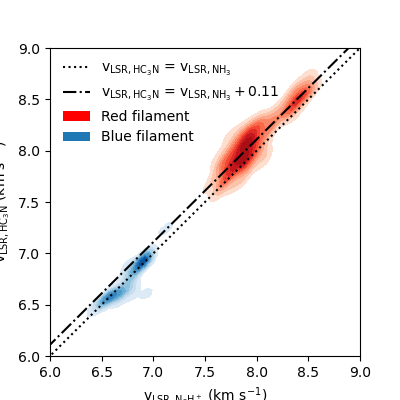

In [36]:
def shifted_line(velx, shift):
    return velx + shift

linesample = np.linspace(5.5,9.4, 10)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, zz_blue, cmap='Blues', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax.contourf(xx, yy, zz_red, cmap='Reds', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax.set_ylabel(r'v$_{\mathrm{LSR}, \mathrm{HC}_3\mathrm{N}}$ (km s$^{-1}$)')
ax.set_xlabel(r'v$_{\mathrm{LSR}, \mathrm{N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.plot(linesample, linesample, 'k:', label='v$_{\mathrm{LSR}, \mathrm{HC}_3\mathrm{N}}$ = v$_{\mathrm{LSR}, \mathrm{NH}_3}$')
ax.plot(linesample, shifted_line(linesample, 0.11), color='k', linestyle='dashdot', label='v$_{\mathrm{LSR}, \mathrm{HC}_3\mathrm{N}}$ = v$_{\mathrm{LSR}, \mathrm{NH}_3} + 0.11$')
# ax.annotate('\n HC$_3$N v/s NH$_{3}$ v$_{\mathrm{LSR}}$', (0.1, 0.9), xycoords='axes fraction', size=12)
ax.set_xlim([6,9])
ax.set_ylim([6,9])
handles, labels = ax.get_legend_handles_labels()

proxy = [handles[0], handles[1], plt.Rectangle((0,0),1,1,fc='red') , plt.Rectangle((0,0),1,1,fc='C0')]
ax.legend(proxy, [labels[0], labels[1], 'Red filament', 'Blue filament'], loc=0, frameon=False, fontsize=10)

# $\mathrm{V}_{LSR, \mathrm{HC}_3\mathrm{N}} - \mathrm{V}_{LSR, \mathrm{NH}_3}$
fig.savefig('KDE_vlsr_groups.pdf', bbox_inches='tight')

In [14]:
# we take the KDE to see if the difference is significant
diffkde_blue_file = 'diff_HC3N_w_N2Hp_blue_kde.npy'
diffkde_red_file = 'diff_HC3N_w_N2Hp_red_kde.npy'

p_range = np.array([0.15865 * 100, 50., 0.84135 * 100]) # one sigma

if not os.path.exists(diffkde_blue_file) or overwrite:
    data_kde_blue = np.linspace(-1, 1, 100)
    data_blue = diff_blue_vel.flatten()
    data_blue = data_blue[~np.isnan(data_blue)]
    
    diff_blue_median_unc = np.round(np.percentile(data_blue, p_range), decimals=2)

    kernel = stats.gaussian_kde(data_blue)
    dens_diff_blue = kernel(data_kde_blue)
    dens_diff_blue /= simpson(dens_diff_blue, data_kde_blue) # normalizing of probability

    datasave = np.array([data_kde_blue, dens_diff_blue, diff_blue_median_unc], dtype=object)

    np.save(diffkde_blue_file, datasave)
else:
    datasave = np.load(diffkde_blue_file, allow_pickle=True)
    data_kde_blue, dens_diff_blue, diff_blue_median_unc = datasave
    
if not os.path.exists(diffkde_red_file) or overwrite:
    data_kde_red = np.linspace(-1, 1, 100)
    data_red = diff_red_vel.flatten()
    data_red = data_red[~np.isnan(data_red)]
    
    diff_red_median_unc = np.round(np.percentile(data_red, p_range), decimals=2)

    kernel = stats.gaussian_kde(data_red)
    dens_diff_red = kernel(data_kde_red)
    dens_diff_red /= simpson(dens_diff_red, data_kde_red) # normalizing of probability

    datasave = np.array([data_kde_red, dens_diff_red, diff_red_median_unc], dtype=object)

    np.save(diffkde_red_file, datasave)
else:
    datasave = np.load(diffkde_red_file, allow_pickle=True)
    data_kde_red, dens_diff_red, diff_red_median_unc = datasave

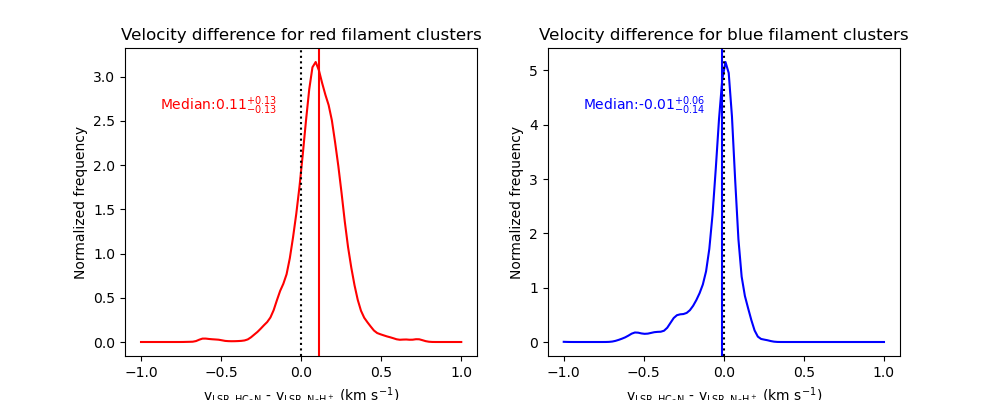

In [17]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)

ax.plot(data_kde_red, dens_diff_red, color='red')
ax.axvline(0, color='k', linestyle='dotted')
ax.axvline(diff_red_median_unc[1], color='red')
ax.annotate(r'Median:'+ str(np.round(diff_red_median_unc[1], 3)) 
            + r'$^{+' +str(np.round(diff_red_median_unc[2]-diff_red_median_unc[1], 3))
            +'}_{-'+str(np.round(diff_red_median_unc[1]-diff_red_median_unc[0], 3)) 
            + r'}$', (0.1, 0.8), xycoords='axes fraction', color='red')

ax.set_xlabel(r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.set_ylabel('Normalized frequency')
ax.set_title('Velocity difference for red filament clusters')

ax2 = fig.add_subplot(122)
ax2.plot(data_kde_blue, dens_diff_blue, color='blue')
ax2.axvline(0, color='k', linestyle='dotted')
ax2.axvline(diff_blue_median_unc[1], color='blue')
ax2.annotate(r'Median:'+ str(np.round(diff_blue_median_unc[1], 3)) 
            + r'$^{+' +str(np.round(diff_blue_median_unc[2]-diff_blue_median_unc[1], 3))
            +'}_{-'+str(np.round(diff_blue_median_unc[1]-diff_blue_median_unc[0], 3)) 
            + r'}$', (0.1, 0.8), xycoords='axes fraction', color='blue')

ax2.set_xlabel(r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax2.set_ylabel('Normalized frequency')
ax2.set_title('Velocity difference for blue filament clusters')

fig.savefig('KDE_diff_clusteredHC3N_clusteredN2Hp.pdf', bbox_inches='tight')

In [ ]:
# diff_HC3N_w_clump0 = [clump_HC3N_rep[1] - clump0_N2Hp[1], clump_HC3N_rep[4] + clump0_N2Hp[4]]
# diff_HC3N_w_clump1 = [clump_HC3N_rep[1] - clump1_N2Hp[1], clump_HC3N_rep[4] + clump1_N2Hp[4]]
# # building the new header
# headerdiff = headerN2Hp.copy()
# headerdiff['NAXIS3'] = 2

# if not os.path.exists(diff_HC3N_N2Hp_0) or overwrite:
#     fits.writeto(diff_HC3N_N2Hp_0, diff_HC3N_w_clump0, headerdiff, overwrite=True)
# if not os.path.exists(diff_HC3N_N2Hp_1) or overwrite:
#     fits.writeto(diff_HC3N_N2Hp_1, diff_HC3N_w_clump1, headerdiff,  overwrite=True)
    
    
# # now we take the minimum difference
# xarray = np.linspace(0, headerdiff['NAXIS1']-1, headerdiff['NAXIS1']).astype(int)
# yarray = np.linspace(0, headerdiff['NAXIS2']-1, headerdiff['NAXIS2']).astype(int)
# deltavarray = np.array([diff_HC3N_w_clump0[0], diff_HC3N_w_clump1[0]]) #all in comparison to the bluest n2hp first
# e_deltavarray = np.array([diff_HC3N_w_clump0[1], diff_HC3N_w_clump1[1]])
# mindiff = np.zeros(np.shape(diff_HC3N_w_clump0)) * np.nan
# signarray = np.sign(deltavarray)
# indexminarray = np.zeros(np.shape(diff_HC3N_w_clump0[0])) * np.nan
# for x in xarray:
#     for y in yarray:
#         if np.all(np.isnan(deltavarray[:,y,x])): continue
#         else:
#             indexmin = np.nanargmin(np.abs(deltavarray[:, y, x]))
#             indexminarray[y,x] = indexmin
#             mindiff[0,y,x] = deltavarray[indexmin, y, x]
#             mindiff[1,y,x] = e_deltavarray[indexmin, y, x]
    
# if not os.path.exists(mindiff_file) or overwrite:
#     fits.writeto(mindiff_file, mindiff, headerdiff,  overwrite=True)

In [18]:
sourcecat = '../data/my_catalog_vel.csv'
catalog_protostars = pd.read_csv(sourcecat)

Unfortunately, there is not much to say about the difference between the HC3N and N2Hp, as the uncertainties are mostly larger than the difference between the values

## Old version: comparing each of the Gaussian components

This still gives us valuable information on what to expect

In [28]:
velcubehc3nfile = '../bayes_frame/nested-sampling/HC3N/vel_components_cube_filtered_QA.fits'
velcuben2hpfile = '../bayes_frame/nested-sampling/N2Hp/vel_components_cube_filtered_QA.fits'
mlex1n2hpfile = '../bayes_frame/nested-sampling/N2Hp/NGC1333-SE-mle-x1_filtered_QA.fits'
mlex2n2hpfile = '../bayes_frame/nested-sampling/N2Hp/NGC1333-SE-mle-x2_filtered_QA.fits' # _QA
mom0n2hpfile = '../data/NGC1333-N2Hp_match_kms_F1F_01_12_K_5_10_mom0.fits' #mom0 of the files used to fit the spectra
mom0hc3nfile = '../data/NGC1333_HC3N_L24-merged_small_K_-3.0_18.0_mom0.fits'
sourcecat = '../data/my_catalog_vel.csv'

diffminfile = 'NGC1333-SE_HC3N-N2Hp_mindiff.fits'
kdefile = 'NGC1333-SE_HC3N-N2Hp'
overwrite = True

In [29]:
# here we load the N2Hp data
velcuben2hp, headervelcuben2hp = fits.getdata(velcuben2hpfile, header=True)
velcuben2hp1, velcuben2hp2 = velcuben2hp
headern2hp = fits.getheader(mom0n2hpfile)
wcssky = WCS(headern2hp).celestial
#catalog of protostars
catalog_protostars = pd.read_csv(sourcecat)

In [30]:
# here we load the files in their original grid and reproject
if not os.path.exists(velcubehc3nfile[:-5]+'_reproject.fits') or overwrite:
    velcubehc3n, headervelcubehc3n = fits.getdata(velcubehc3nfile, header=True)
    headerhc3n = fits.getheader(mom0hc3nfile)
    velcubehc3n1, velcubehc3n2, velcubehc3n3 = velcubehc3n
    velcubehc3n1new, velfootprint = reproject_interp(fits.PrimaryHDU(data=velcubehc3n1, header=headerhc3n), headern2hp)
    velcubehc3n2new, _footprint = reproject_interp(fits.PrimaryHDU(data=velcubehc3n2, header=headerhc3n), headern2hp)
    velcubehc3n3new, _footprint = reproject_interp(fits.PrimaryHDU(data=velcubehc3n3, header=headerhc3n), headern2hp)
    velcubehc3nnew = [velcubehc3n1new, velcubehc3n2new, velcubehc3n3new]
    # building the new header
    headervelcubehc3nnew = headervelcubehc3n.copy()
    headervelcubehc3nnew['NAXIS1'] = headern2hp['NAXIS1']
    headervelcubehc3nnew['NAXIS2'] = headern2hp['NAXIS2']
    headervelcubehc3nnew['CDELT1'] = headern2hp['CDELT1']
    headervelcubehc3nnew['CDELT2'] = headern2hp['CDELT2']
    headervelcubehc3nnew['CRVAL1'] = headern2hp['CRVAL1']
    headervelcubehc3nnew['CRVAL2'] = headern2hp['CRVAL2']
    headervelcubehc3nnew['CRPIX1'] = headern2hp['CRPIX1']
    headervelcubehc3nnew['CRPIX2'] = headern2hp['CRPIX2']
    # save the results
    fits.writeto(velcubehc3nfile[:-5]+'_reproject.fits', velcubehc3nnew, headervelcubehc3nnew, overwrite=True)
else:
    velcubehc3nnew, headervelcubehc3nnew = fits.getdata(velcubehc3nfile[:-5]+'_reproject.fits', header=True)
    velcubehc3n1new, velcubehc3n2new, velcubehc3n3new = velcubehc3nnew


In [31]:
# now that they have the same projection, we can compare the velocity.
# we subtract HC3N from N2Hp to see the relative movement of HC3N with respect to N2Hp
deltav1 = velcubehc3n1new - velcuben2hp1
deltahc3n1nh2 = velcubehc3n1new - velcuben2hp2 # most of the HC3N has one component
deltav2 =  velcubehc3n2new - velcuben2hp2 
deltahc3n2nh1 = velcubehc3n1new - velcuben2hp1
deltahc3n3nh2 = velcubehc3n3new - velcuben2hp2

print('Basic info:')
print('Maximum difference between comp.1', np.nanmax(deltav1))
print('Maximum negative difference between comp.1', np.nanmin(deltav1))
print('Average difference between comp.1', np.nanmean(deltav1))

print('Maximum difference between comp.2', np.nanmax(deltav2))
print('Maximum negative difference between comp.2', np.nanmin(deltav2))
print('Average difference between comp.2', np.nanmean(deltav2))

Basic info:
Maximum difference between comp.1 3.404516137399985
Maximum negative difference between comp.1 -4.711799675722685
Average difference between comp.1 0.18530869101202468
Maximum difference between comp.2 2.8022564325727917
Maximum negative difference between comp.2 -2.2427939123429033
Average difference between comp.2 -0.0031319562118824495


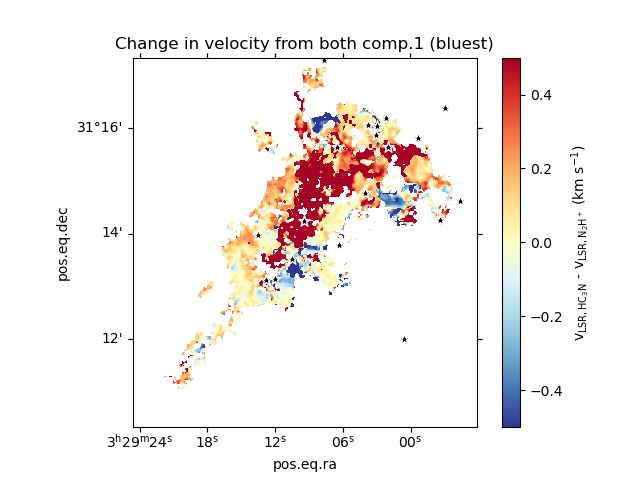

In [32]:
vmin =-0.5
vmax = 0.5


fig = plt.figure()
ax = fig.add_subplot(111, projection=wcssky)

im = ax.imshow(deltav1, cmap='RdYlBu_r', interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=ax, label=r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.set_title('Change in velocity from both comp.1 (bluest)')
for i in catalog_protostars.index.values:
    ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
               transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
    
# fig.savefig('comparison_blueshifted_comps_HC3NminusN2Hp.pdf', dpi=100, bbox_inches='tight')

From this plot we see that HC3N does not cover the middle part of the bluest component of N2Hp, so the two velocity layers are one over the other in N2Hp **but not in HC3N**. This is important for later comparison

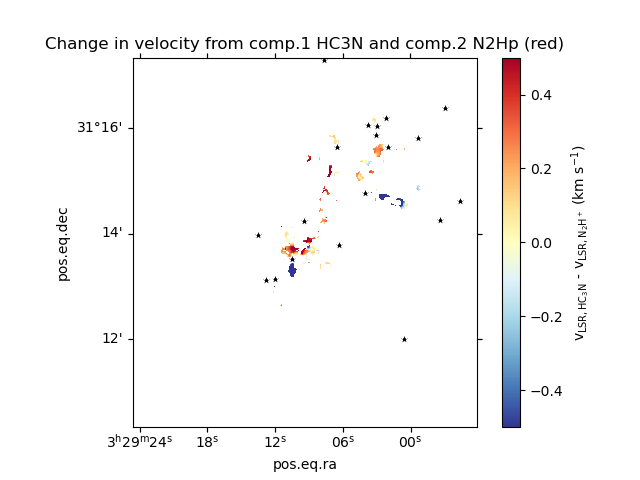

In [33]:
vmin =-0.5
vmax = 0.5


fig = plt.figure()
ax = fig.add_subplot(111, projection=wcssky)

im = ax.imshow(deltav2, cmap='RdYlBu_r', interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=ax, label=r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.set_title('Change in velocity from comp.1 HC3N and comp.2 N2Hp (red)')
for i in catalog_protostars.index.values:
    ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
               transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
    
fig.savefig('comparison_redshifted_comps_HC3NminusN2Hp.pdf', dpi=100, bbox_inches='tight')

In [34]:
# we take the minimum difference to see the true distribution, as HC3N is mostly in two layers that do not overlap
xarray = np.linspace(0, headervelcuben2hp['NAXIS1']-1, headervelcuben2hp['NAXIS1']).astype(int)
yarray = np.linspace(0, headervelcuben2hp['NAXIS2']-1, headervelcuben2hp['NAXIS2']).astype(int)
deltavarray = np.array([deltav1, deltahc3n2nh1, deltahc3n1nh2, deltav2, deltahc3n3nh2]) #all in comparison to the bluest n2hp first
deltavmin = np.zeros(np.shape(deltav1)) * np.nan
signarray = np.sign(deltavarray)
indexminarray = np.zeros(np.shape(deltav1)) * np.nan
for x in xarray:
    for y in yarray:
        if np.all(np.isnan(deltavarray[:,y,x])): continue
        else:
            indexmin = np.nanargmin(np.abs(deltavarray[:, y, x]))
            indexminarray[y,x] = indexmin
            deltavmin[y,x] = deltavarray[indexmin, y, x]
            
            
# deltavmin = np.where(~np.isnan(deltav1) & np.isnan(deltav2), deltav1, np.nan) # we first fill with the values that only have one option
# indexv1 = np.where(~np.isnan(deltav1) & ~np.isnan(deltav2) & (np.abs(deltav1)<np.abs(deltav2)))
# indexv2 = np.where(~np.isnan(deltav1) & ~np.isnan(deltav2) & (np.abs(deltav1)>=np.abs(deltav2)))

deltavminmedian = np.nanmedian(deltavmin)
# for y, x in zip(indexv1[0], indexv1[1]):
#     deltavmin[y, x] = deltav1[y, x]
# for y, x in zip(indexv2[0], indexv2[1]):
#     deltavmin[y, x] = deltav2[y, x]
    
if not os.path.exists(diffminfile) or overwrite:
    headerdiffmin = headern2hp.copy()
    headerdiffmin['BUNIT'] = 'km s-1'
    fits.writeto(diffminfile, deltavmin, headerdiffmin, overwrite=overwrite)


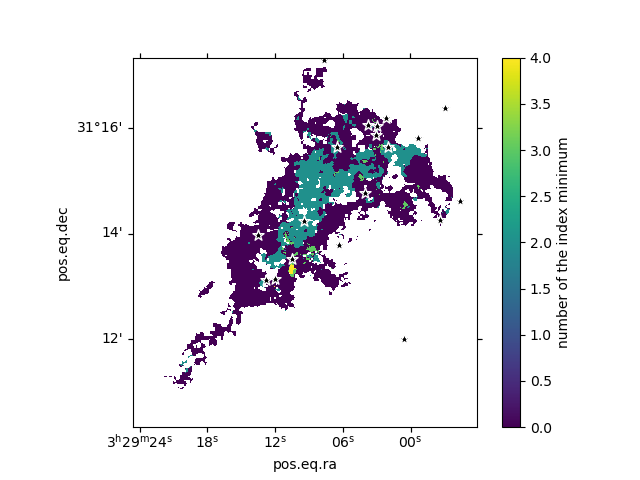

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcssky)

im = ax.imshow(indexminarray, cmap='viridis', interpolation='nearest')
fig.colorbar(im, ax=ax, label=r'number of the index minimum')
# ax.set_title('Minimum change in velocity between HC$_3$ and N$_2$H$^+$')
for i in catalog_protostars.index.values:
    ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
               transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
#     
fig.savefig('comparison_mindiff_comps_HC3NminusN2Hp.pdf', dpi=100, bbox_inches='tight')

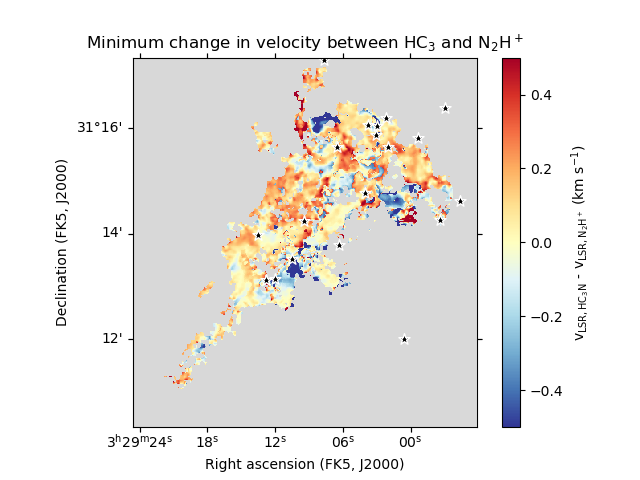

In [37]:
cmap = cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('0.85')
vmin = -0.5
vmax= 0.5

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcssky)

im = ax.imshow(deltavmin, cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=ax, label=r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.set_title('Minimum change in velocity between HC$_3$ and N$_2$H$^+$')
for i in catalog_protostars.index.values:
    ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
               transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)

    
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right ascension (FK5, J2000)')
lat.set_axislabel('Declination (FK5, J2000)')
ax.set_facecolor('0.85')
fig.savefig('comparison_mindiff_comps_HC3NminusN2Hp.pdf', dpi=100, bbox_inches='tight')

In [38]:
# we take the KDE to see if the difference is significant
#this is the difference kde

if not os.path.exists(kdefile+'_histdiff.npy') or overwrite:
    data_kde = np.linspace(-1.0, 1.0, 100)
    data = deltavmin.flatten()
    data = data[~np.isnan(data)]
    p_range = np.array([0.15865 * 100, 50., 0.84135 * 100]) # one sigma
    diff_median_unc = np.round(np.percentile(data, p_range), decimals=2)

    kernel = stats.gaussian_kde(data)
    dens_diff = kernel(data_kde)
    dens_diff /= simpson(dens_diff, data_kde) # normalizing of probability

    datasave = np.array([data_kde, dens_diff, diff_median_unc], dtype=object)

    np.save(kdefile+'_histdiff.npy', datasave)
else:
    datasave = np.load(kdefile+'_histdiff.npy', allow_pickle=True)
    data_kde, dens_diff, diff_median_unc = datasave

/tmp/ipykernel_12043/927099074.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(4,4))


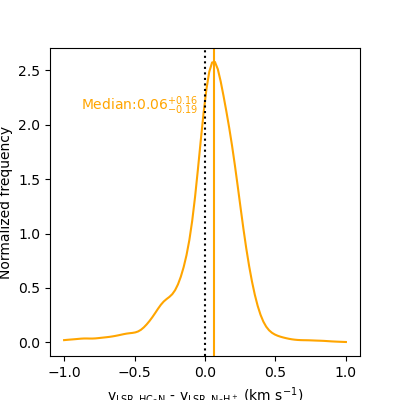

In [39]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(data_kde, dens_diff, color='orange')
ax.axvline(0, color='k', linestyle='dotted')
ax.axvline(deltavminmedian, color='orange')
ax.annotate(r'Median:'+ str(np.round(diff_median_unc[1], 3)) 
            + r'$^{+' +str(np.round(diff_median_unc[2]-diff_median_unc[1], 3))+'}_{-'+str(np.round(diff_median_unc[1]-diff_median_unc[0], 3)) + r'}$', (0.1, 0.8), xycoords='axes fraction', color='orange')

ax.set_xlabel(r'v$_{\mathrm{LSR, HC}_3\mathrm{N}}$ - v$_{\mathrm{LSR, N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.set_ylabel('Normalized frequency')

fig.savefig('KDE_diff_min.pdf', bbox_inches='tight')

In [40]:
# we take the KDE to see if the difference is significant
hc3nkde = np.zeros(np.shape(velcubehc3n1new))*np.nan
n2hpkde = np.zeros(np.shape(velcubehc3n1new))*np.nan
# unfortunately this takes one value per pixel, but there are very few places where HC3N has 2 components so we do not miss anything
for y in range(len(n2hpkde)):
    for x in range(len(n2hpkde[0])):
        if np.isnan(indexminarray[y,x]): continue
        else:
            if indexminarray[y,x]==0:
                hc3nkde[y,x] = velcubehc3n1new[y,x]
                n2hpkde[y,x] = velcuben2hp1[y,x]
            elif indexminarray[y,x]==1:
                hc3nkde[y,x] = velcubehc3n2new[y,x]
                n2hpkde[y,x] = velcuben2hp1[y,x]
            elif indexminarray[y,x]==2:
                hc3nkde[y,x] = velcubehc3n1new[y,x]
                n2hpkde[y,x] = velcuben2hp2[y,x]
            elif indexminarray[y,x]==3:
                hc3nkde[y,x] = velcubehc3n2new[y,x]
                n2hpkde[y,x] = velcuben2hp2[y,x]
            else:
                hc3nkde[y,x] = velcubehc3n3new[y,x]
                n2hpkde[y,x] = velcuben2hp2[y,x]
                
# for y, x in zip(indexv1[0], indexv1[1]):
#     n2hpkde[y, x] = velcuben2hp1[y, x]
# for y, x in zip(indexv2[0], indexv2[1]):
#     n2hpkde[y, x] = velcuben2hp2[y, x]
    
if not os.path.exists(kdefile+'.npy') or overwrite:
    #x is vlsr of HC3N
    xmin = 6
    xmax = 9.5
    # y is v_LSR of 2Hp
    ymin = 6
    ymax = 9.5
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    # we select only those who are not nan
    gd_vlos = np.isfinite(hc3nkde * n2hpkde)
    values = np.vstack([hc3nkde[gd_vlos], n2hpkde[gd_vlos]])
    # we calculate the kernel distribution
    kernel = stats.gaussian_kde(values)
    zz = np.reshape(kernel(positions).T, xx.shape)
    zz /= zz.max()

    datasave = np.array([xx, yy, zz])

    np.save(kdefile+'.npy', datasave)
else:
    datasave = np.load(kdefile+'.npy')
    xx, yy, zz = datasave

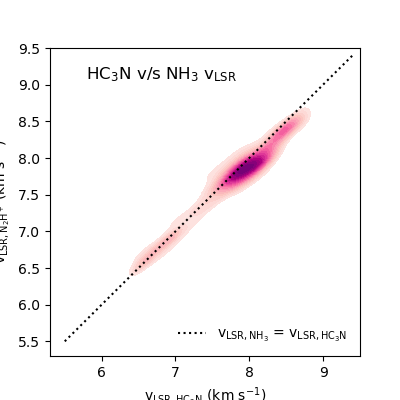

In [41]:
def shifted_line(velx, shift):
    return velx + shift
linesample = np.linspace(5.5,9.4, 10)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.contourf(xx, yy, zz, cmap='RdPu', levels=np.arange(0.1, 1.2, 0.05), vmin=0., vmax=1.1)
ax.set_xlabel(r'v$_{\mathrm{LSR}, \mathrm{HC}_3\mathrm{N}}$ (km s$^{-1}$)')
ax.set_ylabel(r'v$_{\mathrm{LSR}, \mathrm{N}_2\mathrm{H}^+}$ (km s$^{-1}$)')
ax.plot(linesample, linesample, 'k:', label='v$_{\mathrm{LSR}, \mathrm{NH}_3}$ = v$_{\mathrm{LSR}, \mathrm{HC}_3\mathrm{N}}$')
ax.annotate('\n HC$_3$N v/s NH$_{3}$ v$_{\mathrm{LSR}}$', (0.1, 0.9), xycoords='axes fraction', size=12)
# ax.set_xlim([4, 11])
# ax.set_ylim([4, 11])
ax.legend(frameon=False, loc=4)
# $\mathrm{V}_{LSR, \mathrm{HC}_3\mathrm{N}} - \mathrm{V}_{LSR, \mathrm{NH}_3}$
fig.savefig('KDE_vlsr_min.pdf', bbox_inches='tight')